In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 비선형 함수(Nonlinear function)

- 선형 함수 : 출력이 입력의 상수배만큼 변하는 함수
    - Ex) f(x) = Wx + b에서 W와 b는 상수이며 그래프에 직선으로 그려진다.
- 비선형 함수 : 직선 1개로는 그릴 수 없는 함수

- **활성화 함수의 특징** : 비선형 함수여야 한다.
- 선형 함수를 활성화 함수로 사용할 경우 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없다.
    - f(x) = Wx 가 활성화 함수일 경우
    - y(x) = f(f(f(x))) -> W * W * W * x
    - W³ = k 라면 y(x) = kx 와 같이 다시 표현이 가능하다.
- 선형 함수를 활성화 함수로 사용한 층은 학습 가능한 가중치가 새로 생기기 때문에 아무 의미가 없지는 않다. 그래서 선형 함수를 사용한 층을 **선형층(linear layer)** 이나 **투사층(projection layer)** 등의 표현으로 활성화 함수를 사용한 **은닉층(nonlinear layer)** 과 구분한다.

# Sigmoid function과 기울기 소실

## 시그모이드 함수를 사용한 인공 신경망의 학습 과정 (시그모이드 함수의 문제점)
![인공 신경망 예시](../img/NF.png)
1. 입력에 대해서 순전파(forward propagation) 연산을 한다.
2. 순전파 연산으로 나온 예측값과 실제값의 오차를 손실 함수(loss function)로 계산한다.
3. 손실(loss)을 미분을 통해 기울기(gradient)를 구하고, 이를 통해 역전파(back propagation)를 수행한다.

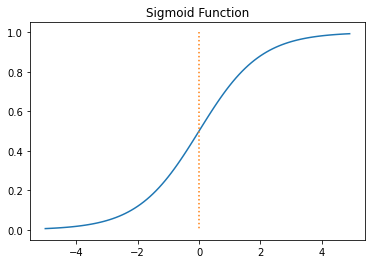

In [2]:
# sigmoid function 그래프 그리기
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선
plt.title('Sigmoid Function')
plt.show()

- 시그모이드 함수의 출력값이 0 또는 1에 가까워지면 그래프의 기울기가 완만해짐을 볼 수 있다.
- **기울기 소실(Vanishing Gradient)** : 완만한 부분은 기울기를 계산하면 0에 가까운 작은 값이 나오는데, 역전파 과정에서 이 작은 기울기가 곱해지면 기울기가 앞으로 잘 전달되지 않는 현상을 의미한다. 이렇게 되면 W가 업데이트 되지 않아 학습이 되지 않는다.
- 결론적으로 시그모이드 함수를 은닉층에 사용하는 것은 지양된다.

# Hyperbolic Tangent Function (하이퍼볼린탄젠트 함수)

- Hyperbolic tangent 함수는 입력값을 -1과 1 사이의 값으로 변환하며
- Sigmoid 함수와 마찬가지로 -1과 1에 가까운 출력값을 출력할 때 기울기 소실이 일어난다.
- 하지만 Sigmoid 함수와 다르게 0을 중심으로 하여 반환값의 변화폭이 더 크기 때문에 비교적 기울기 소실 증상이 적어서 은닉층에서 Sigmoid 함수보다 많이 사용된다.

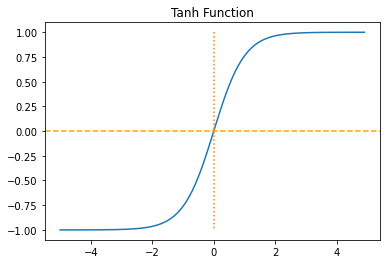

In [3]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

# ReLU (렐루 함수)

- ReLU : 입력이 음수일 경우 0을, 양수일 경우 입력값을 그대로 반환하는 함수이다. (수식 : f(x) = max(0,x))

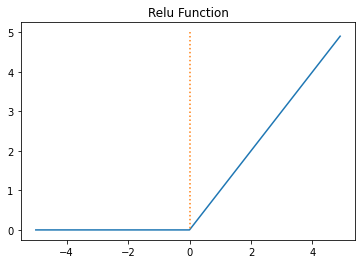

In [4]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

- ReLU 함수는 다른 연산이 필요 없이 단수 임계값이므로 연산 속도가 빠르다.
- 죽은 렐루(dying ReLU) : 임력값이 음수일 경우 기울기가 0이 되며 이 뉴런은 다시 회생하기 매우 어려워지는 문제.

# Leaky ReLU (리키 렐루)

- Leaky ReLU : 죽은 렐루를 보완하기 위해 나온 ReLU의 변형 함수 중 하나로, 입력값이 음수일 경우 0이 아닌 0에 가까운 매운 작은 수를 반환하도록 하였다.
- 수식 f(x) = max(ax, x) 에서 a는 하이퍼파라미터로 Leaky 정도를 결정하며 일반적으로 0.01 값을 가진다.
- Leaky는 '새는'이라는 뜻으로 '새는 정도' 라는 것은 입력값이 음수일 때의 기울기를 비유한다.

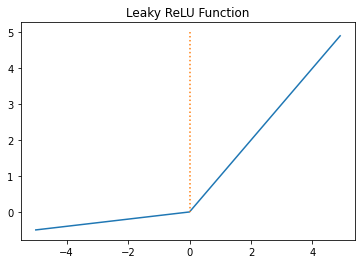

In [5]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1) # Leaky를 0.1로 크게 설정함
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

# Softmax Function (소프트맥스 함수)

- 소프트맥스 함수는 시그모이드 함수처럼 출력층 뉴런에 주로 사용되며, 세 가지 이상의(상호 배타적) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용된다.

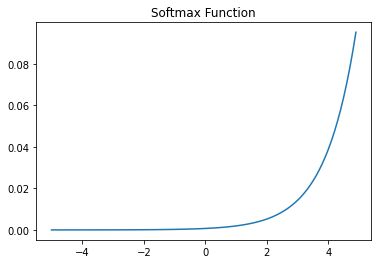

In [6]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

# 출력층의 활성화 함수와 오차 함수의 관계

- 입력층 : 주로 ReLU나 ReLU의 변형 함수를 사용한다.
- 출력층 (문제-활성화 함수-비용 함수)
    - 이진 분류 - 시그모이드 - nn.BCELoss()
    - 다중 클래스 분류 - 소프트맥스 - nn.CrossEntropyLoss()
    - 회귀 - X - MSE